# Space Ship Titanic


1. PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

2. HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

3. CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

4. Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

5. Destination - The planet the passenger will be debarking to.

6. Age - The age of the passenger.

7. VIP - Whether the passenger has paid for special VIP service during the voyage.

8. RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

9. Name - The first and last names of the passenger.

10. Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict





Load Dataset

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suriyakumarr","key":"a58eca92dbbcfaf9c4d32d09cf636028"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c spaceship-titanic


spaceship-titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip spaceship-titanic.zip

Archive:  spaceship-titanic.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [ ]:
train_df['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [ ]:
train_df['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [ ]:
train_df['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

Data Analysis

In [ ]:
## Split passenger id
train_df[['PassengerGroupId', 'PassengerMemberId']] = train_df['PassengerId'].str.split('_', expand=True)
test_df[['PassengerGroupId', 'PassengerMemberId']] = test_df['PassengerId'].str.split('_', expand=True)

In [ ]:
train_df[['Deck', 'CabinNumber', 'Side']] = train_df['Cabin'].str.split('/', expand=True)
test_df[['Deck', 'CabinNumber', 'Side']] = test_df['Cabin'].str.split('/', expand=True)


In [ ]:
train_df.drop(['Name', 'Cabin'], axis = 1, inplace = True)
test_df.drop(['Name', 'Cabin'], axis = 1, inplace = True)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        4277 non-null   object 
 1   HomePlanet         4190 non-null   object 
 2   CryoSleep          4184 non-null   object 
 3   Destination        4185 non-null   object 
 4   Age                4186 non-null   float64
 5   VIP                4184 non-null   object 
 6   RoomService        4195 non-null   float64
 7   FoodCourt          4171 non-null   float64
 8   ShoppingMall       4179 non-null   float64
 9   Spa                4176 non-null   float64
 10  VRDeck             4197 non-null   float64
 11  PassengerGroupId   4277 non-null   object 
 12  PassengerMemberId  4277 non-null   object 
 13  Deck               4177 non-null   object 
 14  CabinNumber        4177 non-null   object 
 15  Side               4177 non-null   object 
dtypes: float64(6), object(10

Perform Imputation

In [ ]:
# Initialize the imputers
mode_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')

In [ ]:
y_train = train_df['Transported']
y_train = y_train.apply(lambda x: 1 if x == 'Yes' else 0)
X_train = train_df.drop('Transported', axis=1)
X_test = test_df

In [ ]:
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
numerical_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CabinNumber']

In [ ]:
X_train[categorical_features] = mode_imputer.fit_transform(train_df[categorical_features])
X_test[categorical_features] = mode_imputer.transform(test_df[categorical_features])

# Impute numerical features
X_train[numerical_features] = median_imputer.fit_transform(train_df[numerical_features])
X_test[numerical_features] = median_imputer.transform(test_df[numerical_features])

In [ ]:
# Function to display unique value counts for both train and test data
def display_unique_value_counts(X_train, X_test, categorical_cols):
    for feature in categorical_cols:
        train_unique_counts = X_train[feature].value_counts(dropna=False)
        test_unique_counts = X_test[feature].value_counts(dropna=False)

        # Combine the unique value counts into a single DataFrame for easy comparison
        unique_counts_df = pd.DataFrame({
            'Train': train_unique_counts,
            'Test': test_unique_counts
        }).fillna(0).astype(int)

        print(f"Unique value counts for feature '{feature}':")
        print(unique_counts_df)
        print("\n" + "="*50 + "\n")

# Display unique value counts for each categorical feature
display_unique_value_counts(X_train, X_test, categorical_features)

Unique value counts for feature 'HomePlanet':
            Train  Test
HomePlanet             
Earth        4803  2350
Europa       2131  1002
Mars         1759   925


Unique value counts for feature 'CryoSleep':
           Train  Test
CryoSleep             
False       5656  2733
True        3037  1544


Unique value counts for feature 'Destination':
               Train  Test
Destination               
TRAPPIST-1e     6097  3048
55 Cancri e     1800   841
PSO J318.5-22    796   388


Unique value counts for feature 'VIP':
       Train  Test
VIP               
False   8494  4203
True     199    74


Unique value counts for feature 'Deck':
      Train  Test
Deck             
F      2993  1545
G      2559  1222
E       876   447
B       779   362
C       747   355
D       478   242
A       256    98
T         5     6


Unique value counts for feature 'Side':
      Train  Test
Side             
S      4487  2193
P      4206  2084




Label Encoding

In [ ]:
label_encoders = {feature: LabelEncoder() for feature in categorical_features}

# Create new DataFrames to store the encoded features
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Fit the LabelEncoders on the training data and transform both training and test data
for feature in categorical_features:
    # Fit the LabelEncoder on the training data
    label_encoders[feature].fit(X_train[feature])

    # Transform the training data
    X_train_encoded[f'{feature}_Encoded'] = label_encoders[feature].transform(X_train[feature])

    # Transform the test data
    X_test_encoded[f'{feature}_Encoded'] = label_encoders[feature].transform(X_test[feature])

# Drop the original categorical columns from the encoded DataFrames
X_train_encoded = X_train_encoded.drop(columns=categorical_features)
X_test_encoded = X_test_encoded.drop(columns=categorical_features)



One-Hot Encoding

In [ ]:
X_train_encoded2 = X_train.copy()
X_test_encoded2 = X_test.copy()

# Perform one-hot encoding on the training and test data
X_train_encoded2 = pd.get_dummies(X_train_encoded2, columns=categorical_features, dtype ="float")
X_test_encoded2 = pd.get_dummies(X_test_encoded2, columns=categorical_features, dtype = "float")


In [ ]:
X_train_encoded2.head()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerGroupId,PassengerMemberId,CabinNumber,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0001,01,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0002_01,24.0,109.0,9.0,25.0,549.0,44.0,0002,01,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0003_01,58.0,43.0,3576.0,0.0,6715.0,49.0,0003,01,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0003_02,33.0,0.0,1283.0,371.0,3329.0,193.0,0003,02,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0004_01,16.0,303.0,70.0,151.0,565.0,2.0,0004,01,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_train_encoded2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                8693 non-null   object 
 1   Age                        8693 non-null   float64
 2   RoomService                8693 non-null   float64
 3   FoodCourt                  8693 non-null   float64
 4   ShoppingMall               8693 non-null   float64
 5   Spa                        8693 non-null   float64
 6   VRDeck                     8693 non-null   float64
 7   PassengerGroupId           8693 non-null   object 
 8   PassengerMemberId          8693 non-null   object 
 9   CabinNumber                8693 non-null   float64
 10  HomePlanet_Earth           8693 non-null   float64
 11  HomePlanet_Europa          8693 non-null   float64
 12  HomePlanet_Mars            8693 non-null   float64
 13  CryoSleep_False            8693 non-null   float

Scaling

In [ ]:
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train_encoded[numerical_features])

# Transform both the training and test data
X_train_encoded[numerical_features] = scaler.transform(X_train_encoded[numerical_features])
X_test_encoded[numerical_features] = scaler.transform(X_test_encoded[numerical_features])

Scaling for one-hot encoded???

Histogram

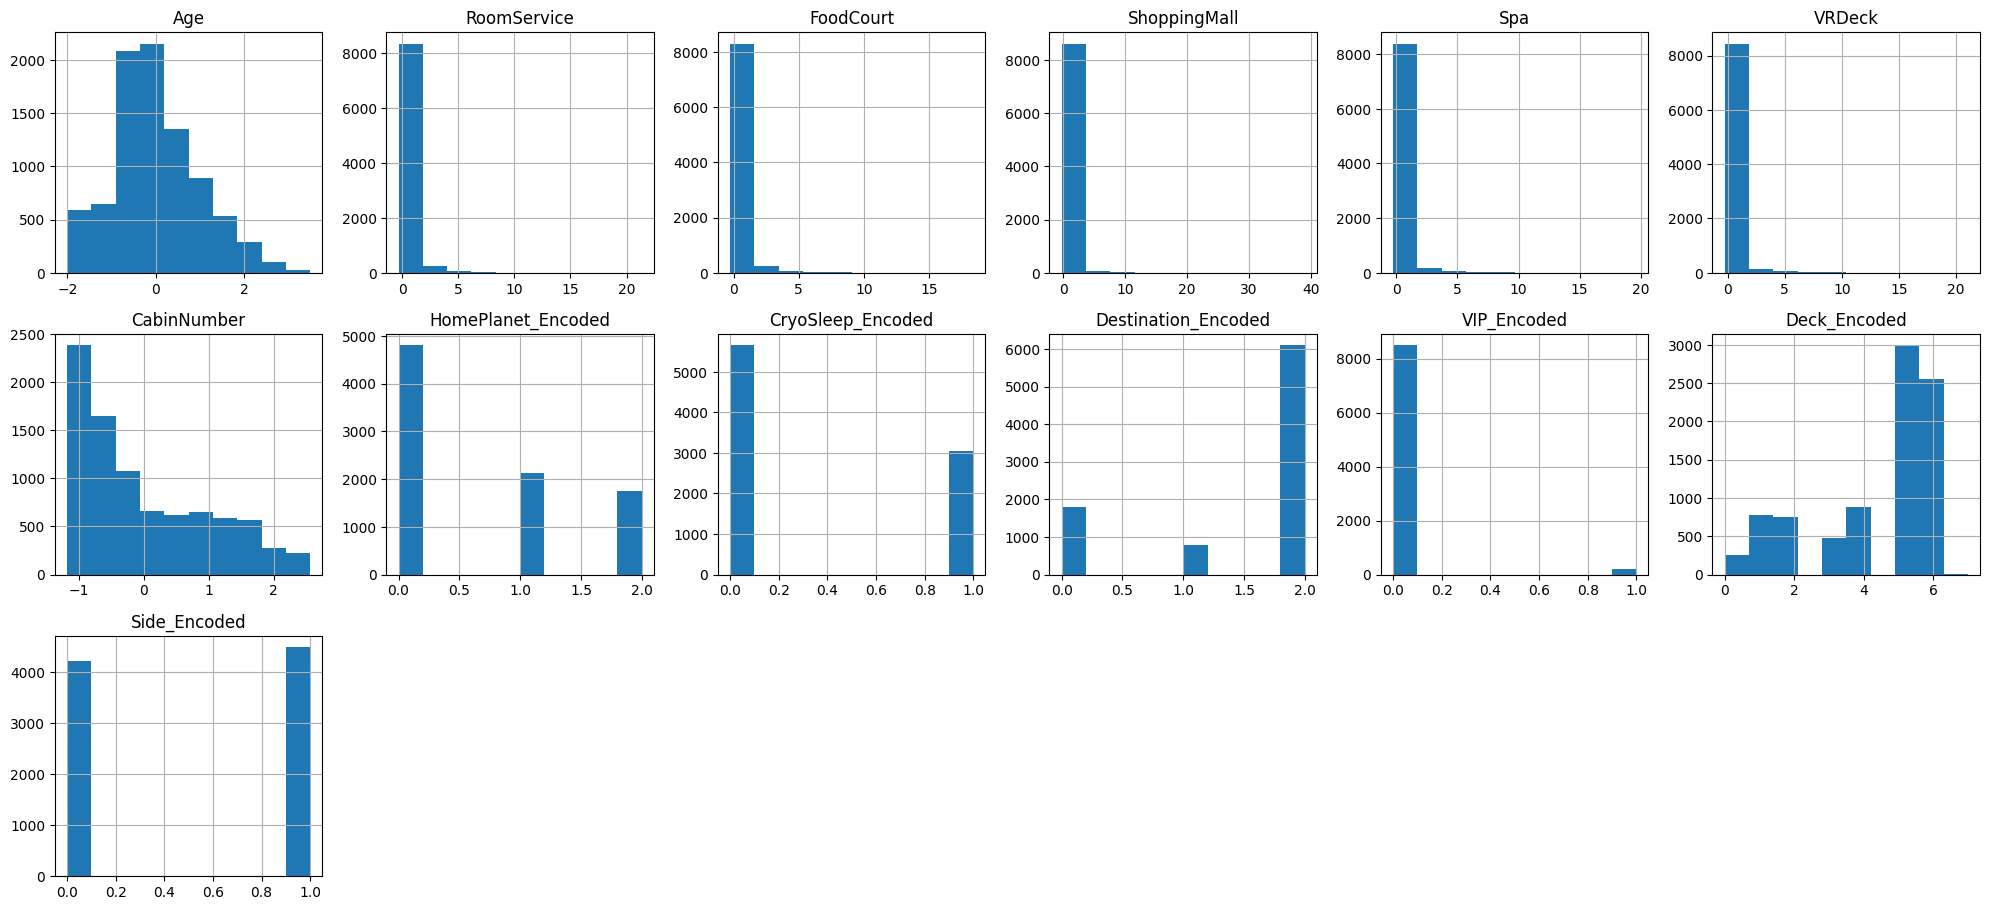

In [ ]:
X_train_encoded.hist(figsize=(20, 15), layout=(5, 6))
plt.tight_layout()  # Adjusts the spacing between plots to avoid overlap
plt.show()

Stratify sample based on age? check correlation with Transported.

What to do about VR Deck, Spa, Shopping mall, food court, room service?